Warning in <TROOT::Append>: Replacing existing TH1: h_d0 (Potential memory leak).


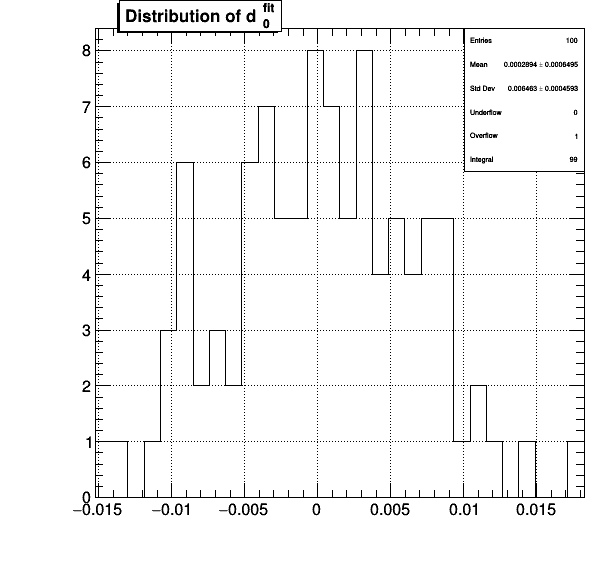

In [14]:
d0_vals = biasplotter_5GeV.d0_ls
h_d0 = TH1F("h_d0", "Distribution of d_{0}^{fit}", 30, min(d0_vals), max(d0_vals))
for num in d0_vals:
    h_d0.Fill(num)
c1 = TCanvas()
h_d0.Draw("hist")
gStyle.SetOptStat("iouRMe")
c1.Draw()